# Estadística Descriptiva en Python

<a id="toc"></a>
## Contenido

- [Instrucciones Generales](#Instruciones-Generales)
- [Conceptos básicos de Estadística Descriptiva](#cg)
  - [Descripción de datos](#dd)
  - [Medidas de centralidad](#Medidas-de-centralidad)
    - [Cálculo de las medidas de tendencia central en Python](#Calculemos-las-medidas-de-tendencia-central-para-los-datos)
  - [Medidas de dispersión](#dispersion)
    - [Cálculo de los valores de dispersión](#cdisp)
  - [Medidas de dispersión (cuartiles)](#mdc)
    - [Calculemos los cuartiles](#cq)
  - [Cuartiles de una variable aleatoria continua](#cqc)
- [Gráficos descriptivos](#gd)
  - [Diagrama de barras y pastel](#dbp)
  - [Histograma](#hist)
    - [Normalización de un histograma](#histn)
  - [Gráfico de densidad](#density)
  - [Diagramas de caja (Boxplot)](#boxplot)
- [Estadísticos de forma de la distribución](#shape)
  - [Sesgo (skewness) o asimetría](#skew)
  - [Curtosis](#Curtosis)
  - [Cálculo del sesgo y la curtosis](#csc)
- [Visualizando la relación entre 2 variables](#twovars) 
  - [Gráfico de dispersión](#scatter)
  - [Cálculo del coeficiente de correlación](#cor)
- [Descripción de datos agrupados](#group)
- [Fuentes y recursos](#Fuentes-y-recursos)

## Instruciones Generales

### Código

- Cuando aparezca esta imagen en el notebook, encontrará código Python que puede ser intermedio o avanzado. 

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python

<br/><br/>

  - **Esta sección es opcional**.
  - Concéntrense en los conceptos que se están tratando. 
  - Cuando se sienta cómodo con Python estudie el código. 

### Experimentación

- Cuando aparezca esta imagen en el notebook, encontrará instrucciones de actividades de experimentación a realizar de forma autónoma para reforzar los temas tratados. 
  - Esto puede ser cambiar un fragmento del código. 
  - O realizar análisis adicionales sobre los resultados presentados. 

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>
<br/>

<a id="cg"></a>
## Conceptos básicos de Estadística Descriptiva

[Volver al índice](#toc)

- Utilizaremos las siguientes librerías para realizar un análsis descriptivo en Python:
  - **numpy:** proporciona muchas funciones de álgebra lineal y cálculo numérico.
  - **pandas:** proporciona estructuras de datos y herramientas de análisis de datos.
  - **seaborn:** diagramas y gráficos para visualización de datos (EDA).
  - **matplotlib:** es la librería base para realizar gráficos en Python. 
  
- Analizaremos el siguiente conjunto de datos (dataset).
  - Primero leeremos estos datos a partir de un archivo .csv (comma separated values).
  
|    | Name   |   Age |   Rating |
|---:|:-------|------:|---------:|
|  0 | Tom    |    25 |     4.23 |
|  1 | James  |    26 |     3.24 |
|  2 | Ricky  |    25 |     3.98 |
|  3 | Vin    |    23 |     2.56 |
|  4 | Steve  |    30 |     3.2  |
|  5 | Smith  |    29 |     4.6  |
|  6 | Jack   |    23 |     3.8  |
|  7 | Lee    |    34 |     3.78 |
|  8 | David  |    40 |     2.98 |
|  9 | Gasper |    30 |     4.8  |
| 10 | Betina |    51 |     4.1  |
| 11 | Andres |    46 |     3.65 |

- El dataset contiene información de 12 trabajadores de recepción (front desk agent) de una cadena de hoteles todo incluido. 
- Variables:
  - Name (nombre): 
  - Age (edad): 
  - Rating (índice) de servicio: 1 (deficiente) a 5 (excelente).
  - Note que la primera columna es un índice único (Python idexa por defecto a partir de 0).
  
- Calcularemos: 
  - Medidas de tendencia central o de posición: ubicación de los valores alrededor de los cuáles fluctúan los demás.
  - Medidas de dispersión: grado de desviación de los datos respecto de las medidas de tendencia central.

- Importación de librerías en Python:
```Python
# Sintaxis general
import modulo as alias
```

- **modulo**: (módulo) librería a importar.
- **alias**: alias con el nos referiremos a la libería. 
- Ejemplo: 
  - Importamos la librería pandas:
```Python
import pandas as pd
```
  - Leemos un archivo usando el alias **pd**, luego punto **.**, y a seguir la función a utilizar **read_csv**:
```Python
pd.read_csv(file)
```

- Primero importamos las librerías a utilizar en este notebook:

```Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

- Luego importamos un archivo csv a un DataFrame en pandas:
  - El símbolo = significa asigación en Python
  - El resultado de la operación que ocurre a la derecha es asignada a la variable a la izquierda

```Python
df = pd.read_csv("data/data_rating.csv")
# visualizamos lo que contiene df en la celda del notebook escribiendo el nombre del dataframe
df
```

In [1]:
# Importar librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# reset rc params to defaults
sns.reset_orig()

# Importamos un archivo csv a un DataFrame en pandas
df = pd.read_csv("data/data_rating.csv")
df

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Smith,29,4.60
6,Jack,23,3.80
7,Lee,34,3.78
8,David,40,2.98
9,Gasper,30,4.80


<a id="dd"></a>
### Descripción de datos

[Volver al índice](#toc)

Cuando llamamos la función describe del DataFrame, 
```Python
df.describe()
```
solo las variables numéricas son incluidas.

El resultado muestra para cada variable (Age, Rating): 
 - número de observaciones (**count**)
 - media (**mean**)
 - desviación estándard (**std**)
 - mínimo, cuartil 0 (**min**)
 - cuartil 1, percentil 25 (**25%**)
 - cuartil 2, mediana, percentil 50 (**50%**)
 - cuartil 3, percentil 75 (**75%**)
 - cuartil 4, máximo (**max**)

In [2]:
# Describimos el DataFrame
df.describe()

,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


El resultado de describir variables categóricas es un conteo de frecuencias:
```Python
df["Name"].describe()
```
En nuestro caso, hay 12 valores únicos en la variable nombre. 

- Note que hemos seleccionado la variable **Name** del DataFrame usando:
```Python
df["Name"]
```
- También podemos usar (si el nombre de la variable es simple):
```Python
df.Name
```

- Una variable de un DataFrame de pandas es un serie.

In [3]:
df["Name"].describe()

count         12
unique        12
top       Betina
freq           1
Name: Name, dtype: object

In [4]:
# Media y desviación de los datos (DataFrame)
print("La media de los datos es:\n", df.mean())  # Centralidad
print("La desviación de los datos es:\n", df.std())  # Dispersión

La media de los datos es:
 Age       31.833333
Rating     3.743333
dtype: float64
La desviación de los datos es:
 Age       9.232682
Rating    0.661628
dtype: float64


In [5]:
# Podemos describir variables individuales (columnas), series de un DataFrame
df['Age'].describe()

count    12.000000
mean     31.833333
std       9.232682
min      23.000000
25%      25.000000
50%      29.500000
75%      35.500000
max      51.000000
Name: Age, dtype: float64

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

**Pregunta 1:** Qué tipo de variable son: nombre (Name), edad (Age), Rating. 

## Medidas de centralidad

[Volver al índice](#toc)

- **Media:**

La media aritmética (o simplemente media) de una lista de números, es la suma de todos los números dividida por el tamaño de la lista. De manera similar, la media de una muestra
$x_{1},x_{2},\ldots ,x_{n}$, generalmente indicado por
${\bar {x}}$, es la suma de los valores muestreados dividida por el número de elementos de la muestra:

$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i,\ \text{ donde } n \text{ es el número de observaciones}.$$

- **Mediana:**

- La mediana es el valor que separa la mitad superior de la mitad inferior de una muestra de datos, una población o una distribución de probabilidad. Para un conjunto de datos, puede considerarse como el valor "medio".

La mediana puede ser definida como sigue: 
Para un conjunto de datos 
$x$ de $n$ elementos (observaciones), ordenados de menor a mayor,

si 
$n$ es impar, 
$$ \mathrm {mediana} (x)=x_{(n+1)/2} $$
si 
$n$ es par, 
$$ \mathrm {mediana} (x)={\frac {x_{(n/2)}+x_{(n/2)+1}}{2}}, $$
donde el subíndice indica la posición en el vector ordenado. 

- **Moda:**

La moda es el valor que aparece con más frecuencia en un conjunto de valores de datos. Si $X$ es una variable aleatoria discreta, la moda es el valor $x$ (es decir, $X = x$) en el que la función de masa de probabilidad (PMF) toma su valor máximo. En otras palabras, es el valor que es más probable que se muestree.

Al igual que la media y la mediana estadísticas, la moda es una forma de expresar, en un número (normalmente) único, información importante sobre una variable aleatoria o una población. El valor numérico de la moda es el mismo que el de la media y la mediana en una distribución normal y puede ser muy diferente en distribuciones muy asimétricas.

La moda no es necesariamente única para una distribución discreta dada, ya que la función de masa de probabilidad puede tomar el mismo valor máximo en varios puntos $x_1, x_2$, etc. El caso más extremo ocurre en distribuciones uniformes, donde todos los valores ocurren con la misma frecuencia.

Cuando la función de densidad de probabilidad (PDF) de una distribución continua tiene múltiples máximos locales, es común referirse a todos los máximos locales como moda de la distribución. Esta distribución continua se llama multimodal (en contraposición a unimodal). La moda de una distribución de probabilidad continua se considera a menudo como cualquier valor $x$ en el que su función de densidad de probabilidad tiene un valor máximo local, por lo que cualquier pico es una moda.

Podemos considerar a la moda como los argumentos de los máximos (abreviado arg max o argmax) que son los puntos, o elementos, del dominio de alguna función en la que se maximizan los valores de la función.

$$ \operatorname {argmax} _{S}f:={\underset {x\in S}{\operatorname {arg\,max} }}\,f(x):=\{x\in S~:~f(s)\leq f(x){\text{ for all }}s\in S\}.$$

### Calculemos las medidas de tendencia central para los datos

[Volver al índice](#toc)

- Media:

  - Pandas implementa la función **mean()**:
```Python
print("La media es:", df["Age"].mean())
```
  - Podemos sumar los elementos y dividir por el número del vector:
```Python
print("La media es:", df["Age"].sum() / df["Age"].size)
```

In [6]:
print("La media es:", df["Age"].mean())
print("La media es:", df["Age"].sum() / df["Age"].size)

La media es: 31.833333333333332
La media es: 31.833333333333332


- Mediana: 

  - Ordenemos los datos
```Python
age = df['Age']
age = np.sort(age)
print(age)
```

  - Calculemos la media para un número par de observaciones (vea definición):
  ```Python
punto_medio = len(age_ordenada)//2
print("La mediana es:", ((age_ordenada[punto_medio-1] + age_ordenada[punto_medio])) / 2)
```

In [7]:
# Ordenemos los datos
age = df['Age']
age_ordenada = np.sort(age)
print("Datos:", age_ordenada)

# Calculemos la media para un número par de observaciones
punto_medio = len(age_ordenada)//2
print("La mediana es:", ((age_ordenada[punto_medio-1] + age_ordenada[punto_medio])) / 2)

Datos: [23 23 25 25 26 29 30 30 34 40 46 51]
La mediana es: 29.5


- También podemos usar pandas para realizar el cálculo.

  - Pandas incluye la función **median()**
```Python
print("La mediana es:", df['Age'].median())
```

In [8]:
# Pandas incluye la función median 
print("La mediana es:", df['Age'].median())

# Ordenemos los datos usando pandas
age_ordenada = df["Age"].sort_values(ignore_index=True)

# Calculemos la mediana para un número par de observaciones
punto_medio = len(age_ordenada)//2
print("La mediana es:", ((age_ordenada[punto_medio-1] + age_ordenada[punto_medio])) / 2)

La mediana es: 29.5
La mediana es: 29.5


- Moda 

  - Pandas implementa la función **mode()**

In [9]:
print("La moda es:") 
print(df['Age'].mode())

La moda es:
0    23
1    25
2    30
dtype: int64


- Moda para valores discretos

  - Obtenemos los valores únicos $x$ y sus frecuencias asociadas $fx$
    - Note que la primera fila, es una indexación (Python indexa a partir de 0).

|    |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |
|:---|----:|----:|----:|----:|----:|----:|----:|----:|----:|
| $x$  |  23 |  25 |  26 |  29 |  30 |  34 |  40 |  46 |  51 |
| $fx$ |   2 |   2 |   1 |   1 |   2 |   1 |   1 |   1 |   1 |

- La moda corresponde a los valores $x$ que se observan con mayor frecuencia ($fx$), en nuestro caso:
  - Moda: 23 (2), 25 (2), 30 (2)
    - Los valoes 23, 25 y 30 son los que se repiten con mayor frecuencia (2).

In [10]:
# Obtenermos los valores únicos de x y sus frecuencias fx
x, fx = np.unique(df["Age"], return_counts=True)
pd.DataFrame({'x': x, "fx": fx}).transpose()

,0,1,2,3,4,5,6,7,8
x,23,25,26,29,30,34,40,46,51
fx,2,2,1,1,2,1,1,1,1


- Ubicamos las posiciones (índices) donde ocurren las máximas frecuencias:

```Python
posiciones_max_frecuencias = np.where(fx == fx.max())
```

- Devolvemos esas posiciones para el vector **x**:

```Python
x[posiciones_max_frecuencias]
```

In [11]:
# Ubicamos donde ocurre el máximo np.where(fx == fx.max()) y devolvemos esas posiciones para x
posiciones_max_frecuencias = np.where(fx == fx.max())
print("Moda: ", x[posiciones_max_frecuencias], "con", fx.max(), "observaciones.")

Moda:  [23 25 30] con 2 observaciones.


<a id="dispersion"></a>
## Medidas de dispersión

[Volver al índice](#toc)

- **Rango:**
  - El rango de un conjunto de datos es el resultado de restar el máximo y el mínimo de la muestra.
  - Para un conjunto de valores $x$ el $Rango(x)$ se define como:
$$Rango(x) = max(x) - min(x) = \text{Valor mayor - valor menor}.$$
  - Es sensible a outliers.
  - Tiene la misma unidad de medida que las observaciones. 

- **Varianza muestral (corregida):**
  - La varianza muestral $s^2$ se calcula sobre los datos de la muestra y se utiliza para determinar la desviación de las observaciones alrededor de la media.
  - La Varianza es la media aritmética de las desviaciones alrededor de la media al cuadrado.
  - Considere un conjunto de números $\{x_1,x_2,...,x_n \}$ con una media muestral $\bar{x}$. 
    - La **varianza** del conjunto es:
$$s^2=\frac{(x_1-\bar{x})^2+(x_2-\bar{x})^2+...+(x_n-\bar{x})^2}{n-1}.$$
$$s^2=\sum_{i=1}^n\frac{(x_i-\bar{x})^2}{n-1}.$$

- **Desviación estándar (corregida):**
  - La desviación estándar es una medida de la cantidad de variación o dispersión de un conjunto de valores. Una desviación estándar baja indica que los valores tienden a estar cerca de la media del conjunto de datos, mientras que una desviación estándar alta indica que los valores se distribuyen en un rango más amplio.
  - La desviación estándar se define como la raíz cuadrada de la desviación:
  $$s= \sqrt {\sum_{i=1}^n\frac{(x_i-\bar{x})^2}{n-1}}.$$



<a id="cdisp"></a>
### Calculamos los valores de dispersión definidos arriba

[Volver al índice](#toc)

- Vea el uso de format, usado en el impresión de la varianza y desviación estándar: https://www.w3schools.com/python/ref_string_format.asp

- Pandas implementa las funciones **var()** y **std()**.

In [12]:
# Imprimimos el rango
print("El rango es:", df["Age"].max() - df["Age"].min())

# Imprimimos varianza y desviación con 2 decimales
print("La varianza es {:.2f}, y la desviación {:.2f}".format(df["Age"].var(), df["Age"].std()))

El rango es: 28
La varianza es 85.24, y la desviación 9.23


### Opcional: Practica Python

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/><br/>
<br/><br/>
<br/>

- Calculemos la varianza paso a paso:
  - Debemos recorrer (iterar) por los valores en el vector **Age**:
  - Usamos para esto una lista por comprensión (https://www.w3schools.com/python/python_lists_comprehension.asp): 
  
```Python
[... for elemento in vector]

for elemento in vector  # recorre cada uno de los elementos en vector
for age_i in df["Age"]  # recorre cada uno de los (doce) elementos en df["Age"], 
                        # age_i toma cada valor individual en una iteración dada
...  # definimos una operación que es repetida de acuerdo al bucle for

(age_i - df["Age"].mean())**2  ## Operación a realizar

# Juntamos todos los elementos para calcular la varianza
varianza = sum([(age_i - df["Age"].mean())**2 for age_i in df["Age"]]) / (df["Age"].size - 1)

# Usamos la función raíz cuadrada de numpy para calcular la desvación estándar
desv_std = np.sqrt(varianza)
```

In [13]:
varianza = sum([(age_i - df["Age"].mean())**2 for age_i in df["Age"]]) / (df["Age"].size - 1)
desv_std = np.sqrt(varianza)  # numpy raíz cuadrada sqrt
print("La varianza es {:.2f}, y la desviación {:.2f}".format(varianza, desv_std))

La varianza es 85.24, y la desviación 9.23


In [14]:
# El cálculo puede ser simplificado gracias a las estrucuturas de datos de pandas
varianza = ((df["Age"] - df["Age"].mean())**2).sum() / (df["Age"].size - 1)
desv_std = np.sqrt(varianza)
print("La varianza es {:.2f}, y la desviación {:.2f}".format(varianza, desv_std))

La varianza es 85.24, y la desviación 9.23


<a id="mdc"></a>
## Medidas de dispersión (continuación)

[Volver al índice](#toc)

- **Cuartiles:**

  - Un cuartil es un tipo de cuantil que divide el número de puntos en los datos en cuatro partes, o cuartos, de tamaño más o menos igual. Los datos deben ordenarse de menor a mayor para calcular los cuartiles; como tal, **los cuartiles son estadísticos de orden.** 

  - Los tres cuartiles principales son los siguientes:

    - El primer cuartil (Q1) se define como el número medio entre el número más pequeño (mínimo) y la mediana del conjunto de datos. También se lo conoce como el cuartil empírico inferior o número 25, ya que el 25% de los datos está por debajo de este punto.
    - El segundo cuartil (Q2) es la mediana de un conjunto de datos; por lo tanto, el 50% de los datos se encuentra por debajo de este punto.
    - El tercer cuartil (Q3) es el valor medio entre la mediana y el valor más alto (máximo) del conjunto de datos. Se lo conoce como el cuartil empírico superior o 75, ya que el 75% de los datos se encuentran por debajo de este punto. 
    - Note que hay diferentes métodos para calcular cuartiles en el caso discreto: https://en.wikipedia.org/wiki/Quartile#Computing_methods
    
- **Rango intercuartílico:**

  - El **rango intercuartílico RIC** (IQR en inglés), está definido como:
  $$IQR = Q3 - Q1$$
  - Si bien el máximo y el mínimo (rango) también muestran la dispersión de los datos, los cuartiles superior e inferior pueden proporcionar información más detallada sobre la ubicación de puntos de datos específicos, la presencia de valores atípicos en los datos y la diferencia en la dispersión entre el 50% medio de los datos y los puntos de datos externos.
  - El rango intercuartil se utiliza para describir la dispersión de los datos. A medida que aumenta la dispersión de los datos, el IQR se hace más grande.

<a id="cq"></a>
### Calculemos los cuartiles para la variable Age

[Volver al índice](#toc)

- Recordemos que la función describe() de pandas devuelve los cuartiles: $Q0$ (mínimo), $Q1$, $Q2$, $Q3$, $Q4$ (máximo).

```Python
df['Age'].describe()
```

Si el nombre de la variable es simple, podemos usar 
```Python
DataFrame.Variable 
```
para acceder a ella de la misma forma que usamos
```Python
DataFrame["Variable"]
```

In [15]:
# Cuartiles usando pandas
df['Age'].describe()

count    12.000000
mean     31.833333
std       9.232682
min      23.000000
25%      25.000000
50%      29.500000
75%      35.500000
max      51.000000
Name: Age, dtype: float64

In [16]:
# Cuartiles usando numpy
np.quantile(df['Age'], [0.25, 0.5, 0.75])

array([25. , 29.5, 35.5])

### Opcional: Practica Python

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/><br/>
<br/><br/>
<br/>


Podemos usar la implementación en numpy para calcular cuantiles:
```Python
Cuartiles = np.quantile(df['Age'], q=[0.25, 0.5, 0.75])
```
Debemos pasar la serie de datos **df['Age']**, y luego los cuantiles **q=[0.25, 0.5, 0.75]**
que deseamos calcular.

La función devuelve tantos elementos como el vector $q$ contenga.

Podemos imprimir los cuantiles usando un bucle (**for**) para imprimir cada elemento contenido en $Q$:
```Python
for i, Qi in enumerate(Cuartiles): print("Q"+str(i+1)+": {}".format(Qi))
```

In [17]:
Cuartiles = np.quantile(df['Age'], [0.25, 0.5, 0.75])
print("Cuartiles:", Cuartiles)
# Imprimimos cada elemento individual en Cuartiles
for i, Ci in enumerate(Cuartiles): print("Q"+str(i+1)+": {}".format(Ci))

Cuartiles: [25.  29.5 35.5]
Q1: 25.0
Q2: 29.5
Q3: 35.5


- Calculemos los cuartiles para un número par de datos:
  - Ya hemos calculado antes la mediana o $Q2$.
  - Podemos generalizar el cálculo del cuantil $Q_i$ de la siguiente manera para un vector ordenado $x$ de longitud par $n$:
  $$
  \mathrm {Q_i}(x)=qi \cdot x_{(P{qi})} + (1-qi) \cdot x_{(P{qi}+1)}, 
  \quad P{qi} = \lfloor n \times q_i \rfloor.  \quad \lfloor x \rfloor \text{ indica un redondeo al inferior.}
  $$
  - Note que el cálculo abajo, corrige la indexación para Python, que indexa a partir de 0.
  

### Opcional: Practica Python

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

In [18]:
# Ordenemos los datos
age = df['Age']
age_ordenada = np.sort(age)
print("Datos:", age_ordenada)

q1 = 0.25  # Cuartil 2
P_q1 = int(age_ordenada.size * q1)  # posición del cuartil 1, use redondeo al inferior
print("El primer cuartil (Q1) es:", age_ordenada[P_q1-1]*q1 + age_ordenada[P_q1]*(1-q1))

q2 = 0.5  # Cuartil 2
P_q2 = int(age_ordenada.size * q2)  # posición del cuartil 2, use redondeo al inferior
print("La mediana (Q2) es:", q2*age_ordenada[P_q2-1] + (1-q2)*age_ordenada[P_q2])

q3 = 0.75  # Cuartil 2
P_q3 = int(age_ordenada.size * q3)  # posición del cuartil 1, use redondeo al inferior
print("El tercer cuartil (Q3) es:", q3*age_ordenada[P_q3-1] + (1-q3)*age_ordenada[P_q3])

Datos: [23 23 25 25 26 29 30 30 34 40 46 51]
El primer cuartil (Q1) es: 25.0
La mediana (Q2) es: 29.5
El tercer cuartil (Q3) es: 35.5


In [19]:
# Usemos bucles para el código anterior
# Cuartiles
Q = [0.25, 0.5, 0.75]
# Posciones (índices) de los cuartiles, tiene que ser un número entero
# se redondea al inferior dado que la indexación en Python empieza en cero
P_q = [int(age_ordenada.size * qi) for qi in Q]

print("Cuartiles:", [qi*age_ordenada[p_qi-1] + (1-qi)*age_ordenada[p_qi] 
                     for qi, p_qi in zip(Q, P_q)])

Cuartiles: [25.0, 29.5, 35.5]


Podemos concluir que el 50% de los datos centrales se encuentran entre $Q1=25$ y $Q3=35.5$. 

- Calculemos el rango intercuartílico (IQR):
$$
IQR = Q3 - Q1
$$
  - Si tuvieramos que comparar dos conjuntos de datos, 
recordemos que a medida que aumenta la dispersión, el IQR se hace más grande.

In [20]:
Q1, Q3 = np.quantile(df['Age'], [0.25, 0.75])  # Asignación de tupla
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 10.5


<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

- **Pregunta 2**: Repita los cálculos de medidas de centralidad y dispersión, para la variable **Rating**.
  - Utilice la implementación en pandas y/o numpy. 
    - Si quiere practicar Python, replique la implementación paso a paso realizada para la variable Age.
  - En el caso de la moda, describa como la calcularía. 

<a id="cqc"></a>
### Para el caso de una variable aleatoria continua, los cuartiles pueden determinar de la siguiente manera:

[Volver al índice](#toc)

- Si definimos una distribución de probabilidad continua como
$P(X)$ donde
$X$ es una variable aleatoria continua, su función de distribución acumulada (CDF) está dada por,

$$ F_{X}(x) = P (X \leq x).$$

- La CDF da la probabilidad de que la variable aleatoria
$X$ sea menor que un valor dado $x$.
- Por tanto, el primer cuartil es el valor de $x$ que cumple que 
$F_{X}(x) = 0.25$, el segundo cuartil es
$x$ cuando
$F_{X} (x) = 0.5$, y el tercer cuartil es
$x$ cuando
$F_ {X} (x) = 0.75$. 
Los valores de
$x$ se puede encontrar con la función cuantil
$Q(p)$ con
$p = 0.25$ para el primer cuartil,
$p = 0.5$ para el segundo cuartil, y
$p = 0.75$ para el tercer cuartil. 

- La función cuantil es la inversa de la función de distribución acumulada.

### Cuartiles de una v.a. continua

- Vamos a representar los cuartiles para una variable aleatoria $X$ con una distribución normal estándar $X\sim N(\mu=0, \sigma=1)$.

- Note en el panel izquierdo que el area a la izquierda de Q1 es del 25%, a la izquierda de Q2 es 50% y a la izquierda de Q3 es 75% del area total bajo la curva. 
  - Esto se refleja en la función acumulada en el panel derecho. 

  - **Conceptos como función de densidad de probabilidad, función de probabilidad acumulada se tratarán en las semanas 2 y 3.**

### Opcional: Practica Python

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/><br/>
<br/><br/>
<br/>

A continuación se detalla parte del código:

- Note que se usa una lista por comprensión
```Python
# lista por comprensión
[operacion for i in range(repeticiones)]
```
  - La operación consite en agregar texto al gráfico 
```Python
plt.text(q[i], 0, "Q"+str(i+1)) 
```
  - Se repite para cada cuartil (3 veces)
```Python
for i in range(3)
```
  - Resultado:
```Python
[plt.text(q[i], 0, "Q"+str(i+1)) for i in range(3)]
```

- Graficamos lineas verticales en el gráfico:
```Python
plt.vlines(valor_en_x, minimo_en_y, maximo_en_y, linestyles=estilo_de_linea)
```  
- Resultado:
```Python
plt.vlines(q, [0]*3, norm.pdf(q), linestyles="dotted")
```
- Graficamos lineas horizontales en el gráfico:
```Python
plt.hlines(valor_en_y, minimo_en_x, maximo_en_x, linestyles=estilo_de_linea)
```
- Resultado:
```Python
plt.hlines(p, [-4]*3, q, linestyles="dotted")
```

Cuartiles: [-0.6745  0.      0.6745]


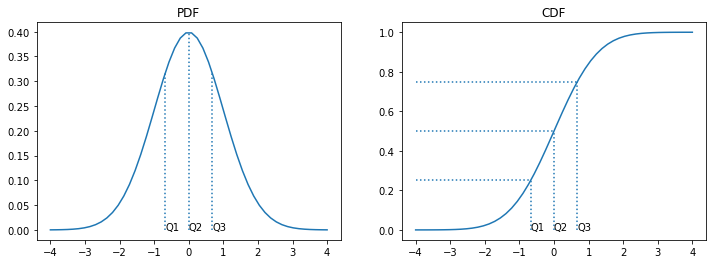

In [21]:
from scipy.stats import norm  # importa una distribución normal

plt.figure(figsize=(12,4))  # tamaño de la figura 

plt.subplot(1,2,1)  # Panel 1
x = np.linspace(-4, 4)  # Rango de valores en que graficaremos la función
plt.plot(x, norm.pdf(x))  # Función de densidad de probabilidad
plt.title("PDF")  

p = [0.25, 0.5, 0.75]  # probabilidades acumuladas para Q1, Q2, Q3
q = norm.ppf([0.25, 0.5, 0.75])  # Cuartiles, ppf es la función cuantil Q(p)
print("Cuartiles:", np.round(q,4))

plt.vlines(q, [0]*3, norm.pdf(q), linestyles="dotted")
q_text = [plt.text(q[i], 0, "Q"+str(i+1)) for i in range(3)]

plt.subplot(1,2,2)

plt.plot(x, norm.cdf(x))  # Función de probabilidad acumulada 
plt.title("CDF")

plt.hlines(p, [-4]*3, q, linestyles="dotted")
plt.vlines(q, [0]*3, p, linestyles="dotted")
q_text = [plt.text(q[i], 0, "Q"+str(i+1)) for i in range(3)]

<a id="gd"></a>
## Graficaremos nuestros datos para ver cómo se distribuyen

[Volver al índice](#toc)

<a id="dbp"></a>
### Diagrama de barras y pastel

- Construiremos un diagrama de barras mostrando las frecuencias para cada valor único de la variable Age. 
  - Recuerde que hemos calculado los valores únicos y sus frecuencias cuando calculamos la moda.
  - Una serie de pandas tiene implementados los métodos de:
    - plot.bar()
    - plot.pie()
  - **sort_index()** ordena la tabla de frecuencias de menor a mayor.

23    2
25    2
26    1
29    1
30    2
34    1
40    1
46    1
51    1
Name: Age, dtype: int64


<AxesSubplot:>

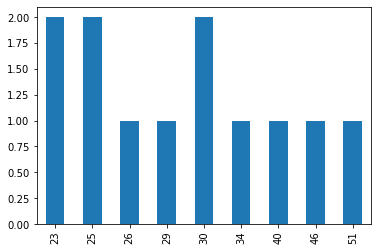

In [22]:
# Diagrama de barras para la variable Age
age_frecuencias = df['Age'].value_counts()  # devuelve valores únicos y sus frecuencias
print(age_frecuencias.sort_index())  # ordenamos de acuerdo a los valores únicos
age_frecuencias.sort_index().plot.bar()  # llamamos el método plot.bar() para nuestra serie

- La moda es claramente identificable en el gráfico de barras arriba. 
  - Moda: 23, 25 y 30 con 2 observaciones cada uno. 
- Podemos representar la misma información usando un gráfico de pastel. 
  - Siempre que pueda, evite usar pasteles. 

<AxesSubplot:ylabel='Age'>

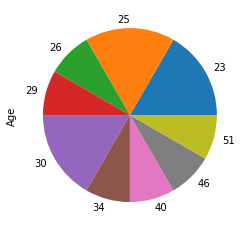

In [23]:
age_frecuencias.sort_index().plot.pie()

<a id="hist"></a>
## Histograma

[Volver al índice](#toc)

- Un histograma es una representación aproximada de la distribución de datos numéricos. Para construir un histograma, el primer paso es "agrupar" el rango de valores, es decir, dividir todo el rango de valores en una serie de intervalos, y luego contar cuántos valores caen en cada intervalo. 

- Los contenedores (bins) generalmente se especifican como intervalos consecutivos que no se superponen de una variable. 

- Los intervalos de los bins deben ser adyacentes y a menudo del mismo tamaño (pero no es obligatorio que lo sean).

### Histogramas en pandas y numpy

Llamamos la función **plot.hist** de pandas para graficar el histograma para la serie especificada, e indicamos el número de bins a construir:
```Python
pandas.Series.plot.hist(bins)
```
- Ejemplo:
```Python
df['Age'].plot.hist(bins=4, edgecolor="white")
```

- Existen diferentes formas de seleccionar el número de bins, y por tanto los intervalos.
  - Sin embargo estas son algo arbitrarias. 
  - La mejor manera de definir el número de bins es de forma empírica. 
    - Pruebe valores diferentes para **plot.hist(bins=4)**.
    - ¿Considera que un número de bins diferente a 4 es mejor para los datos en Age?
    - Vea una **versión interactiva para definir el número de bines en:** https://en-interactive.herokuapp.com/#/1/1

Intervalos: [23. 30. 37. 44. 51.]
Frecuencias: [6 3 1 2]


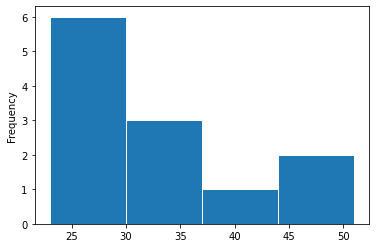

In [24]:
df['Age'].plot.hist(bins=4, edgecolor="white")

frecuencias, intervalos = np.histogram(df['Age'], bins=4)
print("Intervalos:", intervalos)
print("Frecuencias:", frecuencias)

### Opcional: Practica Python

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/><br/>
<br/><br/>
<br/>

- Vamos a construir un histograma
  - Definimos el número de intervalos (bins) a construir entre el mínimo y máximo de los datos.
  - Calculamos el ancho $w$ de los intervalos de la siguiente manera
  $$w = \frac{max(x) - min(x)}{bins}$$
  - Definimos el valor mínimo y máximo de cada intervalo $Int$.
  - Empezando en $Int_0 = min(x)$
    - Repetimos para el número de bins:
      $Int_i = Int_{i-1} + w$
    - El último valor del vector de intervalos es $Int_{bin+1} = max(x)$.
  - Encuentre el número de valores en cada intervalo dado que:
    - $Int_i <= x < Int_{i+1}$
    - Para el último bin use: $Int_i <= x <= Int_{i+1}$, para poder incluir el valor máximo.

In [25]:
bins = 4  # número de bins 
w = (df['Age'].max()-df['Age'].min()) / bins  # ancho de los bins
intervalos = [df['Age'].min()]  # Ini
for i in range(bins):
    intervalos += [intervalos[-1] + w]
    
# transformamos una lista en Python a un array, esto nos permite realizar operaciones númericas sobre el vector
intervalos = np.array(intervalos)
intervalos

array([23., 30., 37., 44., 51.])

In [26]:
frecuencias = []  # frecuencias: frecuencias observadas en cada intervalo

# Para todos los bins excepto el último
for i in range(bins-1):
    frecuencias += [np.where((df['Age'] >= intervalos[i]) & (df['Age'] < intervalos[i+1]))[0].size]

# Último bin
frecuencias += [np.where((df['Age'] >= intervalos[-2]) & (df['Age'] <= intervalos[-1]))[0].size]
frecuencias = np.array(frecuencias)  # transformamos una lista de Python en un array de numpy
frecuencias

array([6, 3, 1, 2])

- Con la informacion de **intervalos** y **frecuencias** podemos construir un gráfico que replique lo generado por la función **plot.hist** de pandas
  - Use para el ancho de las barras, el valor de $w$ calculado.

<BarContainer object of 4 artists>

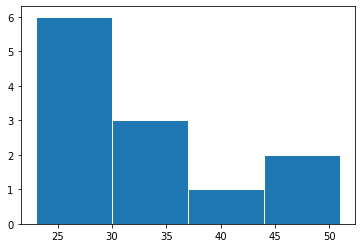

In [27]:
centros = (intervalos[1:] + intervalos[:-1])/2
plt.bar(centros, frecuencias, width=w, edgecolor='white')

<a id="histn"></a>
### De acuerdo al análsis requerido, un histograma puede ser normalizado

[Volver al índice](#toc)

- Esta normalización pude ser para que la suma de las alturas de los bins sea 1 (por probabilidad).
- Para que el área de los bins sume 1 (por densidad).

- **Seaborn nos ayuda a construir estos histogramas.**
  - Por defecto sns.histplot(...) construye frecuencias observadas:
  - La opción 
  ```Python
stat="probability"
```
normaliza el histograma por probabilidad (suma de alturas es 1).
  - La opción 
  ```Python
stat="density"
```
normaliza el histograma por densidad (suma de áreas es 1).

Text(0.5, 1.0, 'Densidad')

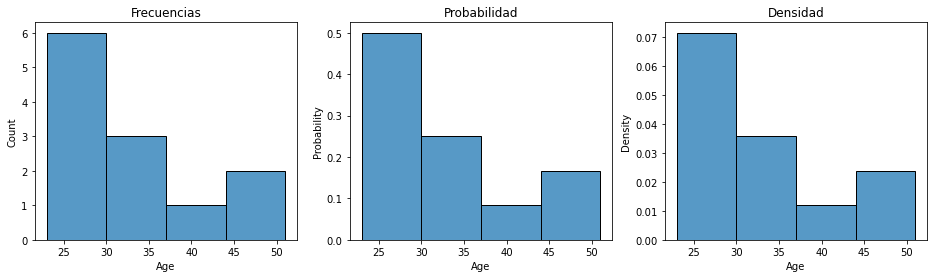

In [28]:
plt.figure(figsize=(16,4))  # Definimos tamaño de figura
# Usaremos paneles en filas x columnas
# subplot(filas, columnas, panel)
plt.subplot(1,3,1)  # panel 1
sns.histplot(data=df, x="Age", bins=4).set_title("Frecuencias")
plt.subplot(1,3,2)  # panel 2
sns.histplot(data=df, x="Age", bins=4, stat="probability").set_title("Probabilidad")
plt.subplot(1,3,3)  # panel 3
sns.histplot(data=df, x="Age", bins=4, stat="density").set_title("Densidad")

- Cuando observamos una variable continua como Rating, es preferible construir un histograma normalizado a que el area sea 1 (densidad).
  - Podemos sobreponer la **curva de densidad** usando seaborn.
  - Vea: M. P. Wand & M. C. Jones, [Kernel Smoothing](https://marsgr6.github.io/presentations/misc/Wand_Jones_KERNEL_SMOOTH.pdf).

<AxesSubplot:xlabel='Age', ylabel='Density'>

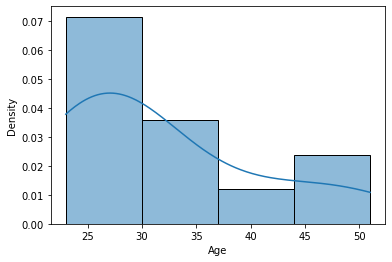

In [29]:
sns.histplot(data=df, x="Age", bins=4, stat="density", kde=True)

<a id="density"></a>
## Gráfico de densidad

[Volver al índice](#toc)

- El gráfico de densidad es una representación de la distribución de una variable numérica. 
- Utiliza una estimación de densidad de kernel para mostrar la función de densidad de probabilidad de la variable (ver más).
- Es una versión suavizada del histograma y se usa en el mismo concepto. 
  - Vea: M. P. Wand & M. C. Jones, [Kernel Smoothing](https://marsgr6.github.io/presentations/misc/Wand_Jones_KERNEL_SMOOTH.pdf).
  - Recurso interactivo: https://mathisonian.github.io/kde/
- Para una variable aleatoria continua se cumple que $\int_{-\infty}^{\infty} f(x)dx = 1$. Por tanto el área bajo la curva de densidad y el área del histograma normalizado por densidad, deben ser de 1. 

    
### Grafiquemos las curvas de densidad para Age y Rating

Text(0.5, 1.0, 'Rating')

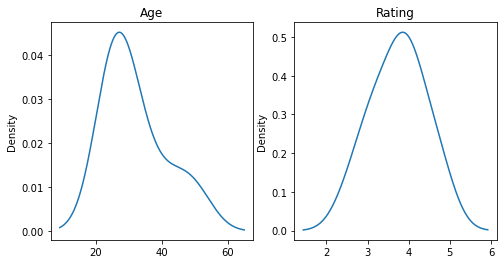

In [30]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df['Age'].plot.density()
plt.title("Age")

plt.subplot(1,2,2)
df['Rating'].plot.density()
plt.title("Rating")

- Vamos a graficar un histograma normalizado por densidad y sobreponer su curva de densidad correspondiente para las variables Age y Rating

Text(0.5, 1.0, 'Rating')

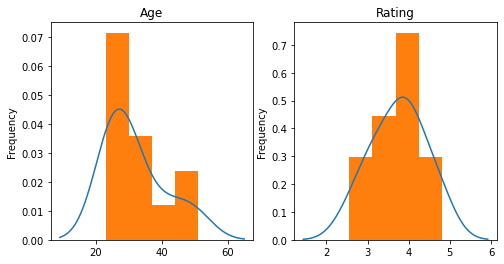

In [31]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df['Age'].plot.density()
df['Age'].plot.hist(bins=4, density=True)
plt.title("Age")

plt.subplot(1,2,2)
df['Rating'].plot.density()
df['Rating'].plot.hist(bins=4, density=True)
plt.title("Rating")

- **Volvamos a nuestro histograma de numpy**
  - Normalizemos usando probabilidad.
  - Construyamos una versión simple de nuestra curva de densidad.
    - En realidad es un **gráfico de ojiva**.
    - Un gráfico de ojiva, también llamada polígono de frecuencias, es un tipo de polígono que muestra las frecuencias observadas. Un gráfico de ojiva muestra la frecuencia observada en el eje $y$ y los centros de los intervalos (bins) en el eje $x$.
    - De manera similar a un histograma, el gráfico de ojiva puede construirse para las frecuencias observadas, las frecuencias relativas (probabilidad), para las frecuencias acumuladas, y para la densidad. 

Text(0.5, 1.0, 'Histograma acumulado')

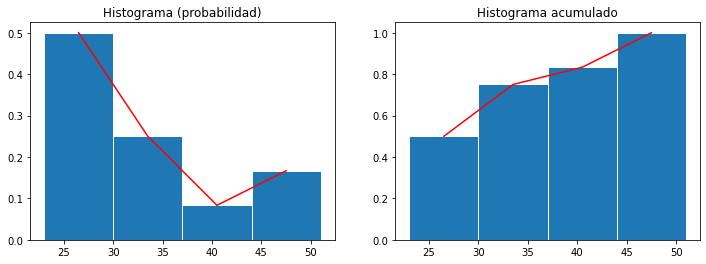

In [32]:
# Calculemos el histograma para Age
frecuencias, intervalos = np.histogram(df['Age'], bins=4)
centros = (intervalos[1:] + intervalos[:-1])/2  # centro de los bins

plt.figure(figsize=(12,4))  # Definimos tamaño de figura
# Usaremos paneles en filas x columnas
# subplot(filas, columnas, panel)
plt.subplot(1,2,1)  # panel 1, histograma normalizado por probabilidad
# frecuencias/frecuencias.sum(), normaliza por probabilidad, suma de las alturas es 1
plt.bar(centros, frecuencias/frecuencias.sum(), width=w, edgecolor='white')
plt.plot(centros, frecuencias/frecuencias.sum(), color="red")
plt.title('Histograma (probabilidad)')

plt.subplot(1,2,2)  # panel 2, histograma acumulado
# Vea el uso de la función cumsum()
plt.bar(centros, (frecuencias/frecuencias.sum()).cumsum(), width=w, edgecolor='white')
plt.plot(centros, (frecuencias/frecuencias.sum()).cumsum(), color="red")
plt.title('Histograma acumulado')

Text(0.5, 1.0, 'Histograma acumulado')

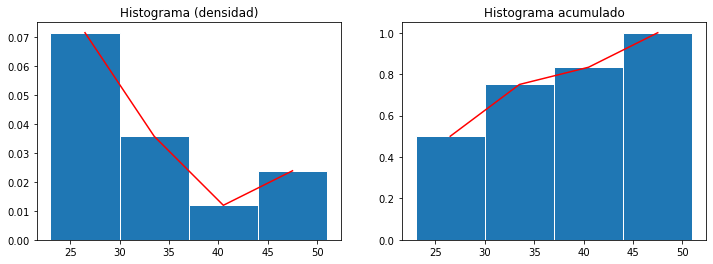

In [33]:
# Calculemos el histograma para Age normalizado por densidad, density=True
frecuencias, intervalos = np.histogram(df['Age'], bins=4, density=True)

plt.figure(figsize=(12,4))  # Definimos tamaño de figura
# Usaremos paneles en filas x columnas
# subplot(filas, columnas, panel)
plt.subplot(1,2,1)  # panel 1, histograma normalizado por densidad
centros = (intervalos[1:] + intervalos[:-1])/2
plt.bar(centros, frecuencias, width=w, edgecolor='white')
plt.plot(centros, frecuencias, color="red")
plt.title('Histograma (densidad)')

plt.subplot(1,2,2)  # panel 2, histograma acumulado
# El area de cada bin es calculado como frecuencias*w 
# Recordemos que en la normalización por densidad, el área de los bins suma 1
plt.bar(centros, (frecuencias*w).cumsum(), width=w, edgecolor='white')
plt.plot(centros, (frecuencias*w).cumsum(), color="red")
plt.title('Histograma acumulado')

<a id="boxplot"></a>
## Diagramas de caja (Boxplot)

[Volver al índice](#toc)

Un diagrama de caja muestra un resumen de cinco números:
1. El valor menor, mínimo (Q0).
2. El primer cuartil (Q1).
3. La mediana (Q2).
4. El tercer cuartil (Q3).
5. El valor mayor, máximo (Q4).

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/boxplot.png" alt="" width="400"/>

- El diagrama está compuesto por la caja (box) contenida entre los cuartiles Q1 y Q3, e incluye la mediana Q2.
- Los bigotes (whiskers) son las líneas que se extienden más alla de la caja, y se utilizan para indicar la variabilidad fuera de los cuartiles superior (Q3) e inferior (Q1).
- El rango intercuartílico RIC (IQR en inglés) se usa para construir los bigotes.
  - El límite inferior de los bigotes se extiende hasta:
  $$L_i = Q_1 - 1.5 IQR,$$
    - siempre y cuando $L_i \geq min(x)$, en caso contrario se extienden hasta $min(x)$.
  - El límite superior de los bigotes se extiende hasta:
  $$L_s = Q_3 + 1.5 IQR,$$
    - siempre y cuando $L_s \leq max(x)$, en caso contrario se extienden hasta $max(x)$.
    - Recuerde que $IQR = Q_3 - Q_1$.
- El diagrama de cajas puede ayudarnos a identificar valores atípicos.
  - Un valor atípico es una observación numéricamente distante del resto de los datos. 
  - Al revisar un diagrama de caja, un valor atípico se define como un punto que se encuentra fuera de los bigotes del diagrama de caja.
  
<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/boxplot5.jpg" width="600"/>

count    12.000000
mean     31.833333
std       9.232682
min      23.000000
25%      25.000000
50%      29.500000
75%      35.500000
max      51.000000
Name: Age, dtype: float64


<AxesSubplot:>

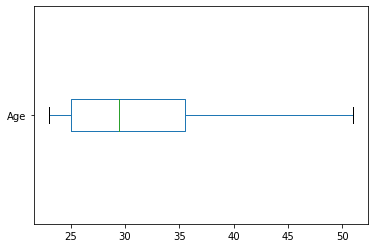

In [34]:
# Graficamos un diagrama de caja (boxplot) 
# Identifique el resumen de 5 puntos mencionado
print(df['Age'].describe())
df['Age'].plot.box(vert=False)

<AxesSubplot:>

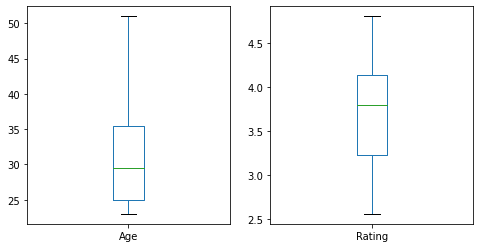

In [35]:
plt.figure(figsize=(8,4))  # Definimos tamaño de figura
# Usaremos paneles en filas x columnas
# subplot(filas, columnas, panel)
plt.subplot(1,2,1)  # panel 1
df['Age'].plot.box()  # vert=True

plt.subplot(1,2,2)  # panel 2
df['Rating'].plot.box()  # vert=True

<AxesSubplot:>

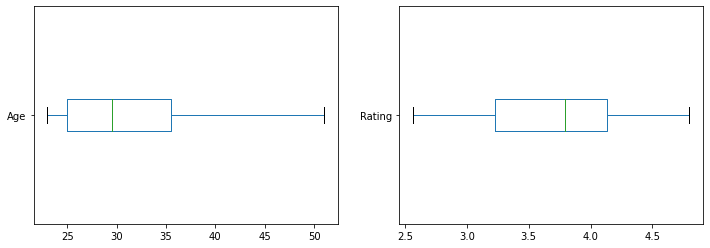

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['Age'].plot.box(vert=False)

plt.subplot(1,2,2)
df['Rating'].plot.box(vert=False)

<a id="shape"></a>
## Estadísticos de forma de la distribución

[Volver al índice](#toc)

<a id="skew"></a>
### Sesgo (skewness) o asimetría

- En teoría de probabilidad y estadística, la asimetría es una medida de la asimetría de la distribución de probabilidad de una variable aleatoria de valor real con respecto a su media. 

- El valor de asimetría puede ser positivo, cero, negativo o indefinido.

- Para una distribución unimodal, el sesgo negativo normalmente indica que la cola está en el lado izquierdo de la distribución y el sesgo positivo indica que la cola está a la derecha.

- Para una muestra de $n$ valores, dos métodos para estimar los momentos del sesgo poblacional son:

$$ b_{1}={\frac {m_{3}}{s^{3}}}={\frac {{\tfrac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{3}}{\left[{\tfrac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}\right]^{3/2}}}
$$

$$ g_{1}={\frac {m_{3}}{m_{2}^{3/2}}}={\frac {{\tfrac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{3}}{\left[{\tfrac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}\right]^{3/2}}}
$$
donde 
$\overline{x}$ es la media muestral, y $s$ es la desviación estándar de la muestra, the sample standard deviation, $m^2$ es el segundo momento central de la muestra sesgado (biased), y $m^3$ es el tercer momento central de la muestra.

- **Tenemos que una definición común del sesgo muestral es:**
$$
{\begin{aligned}G_{1}&={\frac {k_{3}}{k_{2}^{3/2}}}={\frac {n^{2}}{(n-1)(n-2)}}\;b_{1}={\frac {\sqrt {n(n-1)}}{n-2}}\;g_{1},\\\end{aligned}}
$$

- Interpretamos el valor del sesgo de la siguiente manera:
  - Si el sesgo está entre -0,5 y 0,5, los datos son bastante simétricos.
  - Si el sesgo está entre -1 y - 0,5 o entre 0,5 y 1, los datos están moderadamente sesgados.
  - Si el sesgo es menor que -1 o mayor que 1, los datos están muy sesgados.
  

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" alt="" width="600"/>

Explore la relación entre media, mediana y moda de [forma interactiva](https://www.geogebra.org/m/qd7tr6Pr).

In [37]:
print("Sesgo usando pandas:", df['Age'].skew())

m3 = ((1/df['Age'].size)*((df['Age'] - df['Age'].mean())**3).sum()) 
s3 = (((1/(df['Age'].size-1))*((df['Age'] - df['Age'].mean())**2).sum())**(1.5))

b1 = m3/ s3

g1 = ((1/df['Age'].size)*
      ((df['Age'] - df['Age'].mean())**3).sum()) / (((1/(df['Age'].size))*
                                               ((df['Age'] - df['Age'].mean())**2).sum())**(1.5))

print("Sesgo usando la definición arriba:", df['Age'].size**2 / ((df['Age'].size-1)*(df['Age'].size-2)) * b1)

Sesgo usando pandas: 1.135088832399207
Sesgo usando la definición arriba: 1.1350888323992072


### Curtosis

[Volver al índice](#toc)

- En teoría y estadística de probabilidad, la curtosis es una medida de la "cola" de la distribución de probabilidad de una variable aleatoria de valor real.
- Al igual que el sesgo, la curtosis describe la forma de una distribución de probabilidad y existen diferentes formas de cuantificarla para una distribución teórica y las formas correspondientes de estimarla a partir de una muestra de una población.
- La curtosis es el cuarto momento estandarizado.
- En la práctica se usa el exceso de curtosis definida para una muestra de $n$ valores como:

$$\begin{aligned}G_{2}&={\frac {k_{4}}{k_{2}^{2}}}={\frac {(n+1)\,n}{(n-1)\,(n-2)\,(n-3)}}\;{\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{4}}{k_{2}^{2}}}-3\,{\frac {(n-1)^{2}}{(n-2)(n-3)}}\end{aligned}$$

donde $k_2$ es el estimador no sesgado de la varianza muestral. 

  - Esta definición se utiliza para que la distribución normal estándar tenga una curtosis de cero.
  
### Interpretación del exceso de la curtosis:

- **Mesocúrtica:** Las distribuciones con cero exceso de curtosis se denominan mesocúrticas o mesocurtóticas. El ejemplo más destacado de una distribución mesocúrtica es la familia de distribución normal, independientemente de los valores de sus parámetros, y la distribución bininomial con $p=0.5$.
  
- **Leptocúrtica:** Una distribución con un exceso de curtosis positiva se llama leptocúrtica. En términos de forma, una distribución leptocúrtica tiene colas más gruesas, lo que significa que hay más posibilidades de valores atípicos. Ejemplos de distribuciones leptocúrticas incluyen la distribución t de Student, la distribución de Rayleigh, la distribución de Laplace, la distribución exponencial, la distribución de Poisson y la distribución logística.

- **Platicúrtica:** Una distribución con exceso de curtosis negativa se denomina platicúrtica. En términos de forma, una distribución platicúrtica tiene colas más delgadas. Ejemplos de distribuciones platicúrticas incluyen las distribuciones uniformes continuas y discretas. 

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/kurtosis.png" alt="" width="800"/>

In [38]:
print("Curtosis de Age:", df['Age'].kurtosis())

n = df['Age'].size
k2 = df['Age'].var() 

curtosis = (n + 1)*n / ((n-1)*
                        (n-2)*(n-3)) * ((df['Age'] - 
                                         df['Age'].mean())**4).sum() / k2**2 - 3*(n-1)**2 / ((n-2)*
                                                                                          (n-3))

print("Curtosis usando la definición arriba:", curtosis)

Curtosis de Age: 0.24930965861233734
Curtosis usando la definición arriba: 0.24930965861233823


<a id="csc"></a>
### Vamos a calcular el sesgo y la curtosis para las variables Age y Rating 

[Volver al índice](#toc)

Sesgo de Age: 1.135088832399207
Sesgo de Rating: -0.1536286271073282

Curtosis de Age: 0.24930965861233734
Curtosis de Rating: -0.4872359114095164

Interpretemos los valores a partir de los gráficos:


<AxesSubplot:>

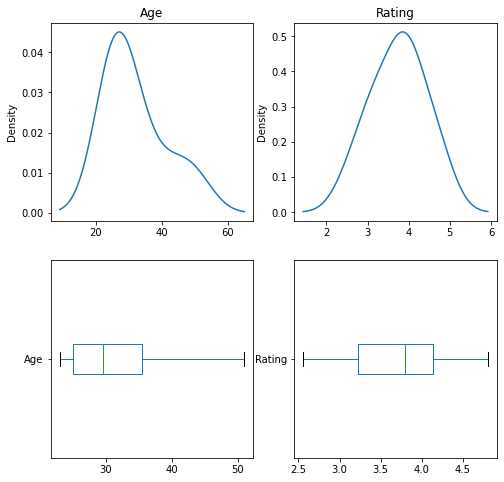

In [39]:
print("Sesgo de Age:", df['Age'].skew())
print("Sesgo de Rating:", df['Rating'].skew())

print("\nCurtosis de Age:", df['Age'].kurtosis())
print("Curtosis de Rating:", df['Rating'].kurtosis())

print("\nInterpretemos los valores a partir de los gráficos:")

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
df['Age'].plot.density()
plt.title("Age")

plt.subplot(2,2,2)
df['Rating'].plot.density()
plt.title("Rating")

plt.subplot(2,2,3)
df['Age'].plot.box(vert=False)

plt.subplot(2,2,4)
df['Rating'].plot.box(vert=False)

**Sesgo:**

```text
Sesgo de Age: 1.135088832399207
Sesgo de Rating: -0.1536286271073282
```

- Podemos observar en el gráfico de densidad que la variable Age tiene una cola más larga hacia la derecha, por tanto tiene un sesgo positivo.
  - El sesgo se observa también en el diagrama de cajas, tanto a interior de la caja, sección a la derecha de la mediana (en verde), como en la extensión de los bigotes, que es mayor para el bigote derecho indicando la asimetría de la distribución y su sesgo positivo. 
  
- Para el caso de la variable Age, existe un ligero sesgo negativo, podemos observar que la cola izquierda es ligeramente mayor a la cola derecha. Sin embargo el valor del sesgo es cercano a cero, es decir la distribución es muy simétrica, como observamos tanto en el gráfico de densidad como en el diagrama de cajas. 

- Podemos analizar el sesgo muestral usando los cuartiles y el rango intercuartílico.
  - Vea: Universidad de Valencia, OCW Estadística I. [Estadísticos de forma](http://ocw.uv.es/ciencias-sociales-y-juridicas/estadistica-i/tema_3_3.pdf).
  
**Curtosis**

```text
Curtosis de Age: 0.24930965861233734
Curtosis de Rating: -0.4872359114095164
```

- Age tiene una curtosis positiva (leptocúrtica) indicando colas más gruesas, que las observadas en Rating que tiene una curtosis negativa, indicando colas más delgadas. 
  - Note que este análsis de colas lo hacemos además de manera visual en las curvas de densidad. Estas curvas son un modelos de los datos observados, que en nuestro caso es una muestra pequeña (12 observaciones). 
  - Sin embargo para nuestro ejercicio son válidas estas conclusiones. 

<a id="twovars"></a>
## Visualizando la relación entre 2 variables

[Volver al índice](#toc)

- Hasta el momento hemos visualizado como está distribuida una única variable numérica.
  - Esto se conoce como análisis univariado.

- Podemos visualizar la relación entre 2 (ó más) variables usando un
    - **Gráfico de dispersión:** es un tipo de gráfico o diagrama matemático que utiliza coordenadas cartesianas para mostrar valores (por lo general de dos variables) de un conjunto de datos (DataFrame). 
    - Si los puntos están codificados (color / forma / tamaño), se puede mostrar información de variables adicionales. 
    
- El análisis gráfico es acompañado de un análisis de correlación

  - El coeficiente de correlación de Pearson también conocido como $r$ de Pearson, correlación bivariada, o coloquialmente simplemente como el coeficiente de correlación, es una medida de correlación lineal entre dos conjuntos de datos. 

  - Es la razón entre la covarianza de dos variables y el producto de sus desviaciones estándar; por lo tanto, es esencialmente una medida normalizada de la covarianza, de modo que el resultado siempre tiene un valor entre -1 y 1. 
  
  - La covarianza se define como:  
$$s_{xy}=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{n-1}$$

  - El coeficiente de correlación de Pearson como:

$$r_{xy}=\frac{s_{xy}}{s_x s_y}$$

  - Al igual que con la covarianza en sí, la medida solo puede reflejar una correlación lineal de variables e ignora muchos otros tipos de relaciones que pueden existir.
  
  - Más alla de que existen recomendaciones para la interpretación de un coeficiente de correlación, todos estos criterios son en cierto modo arbitrarios. La interpretación de un coeficiente de correlación depende del contexto y los propósitos. Una correlación de 0.8 puede ser muy baja si se está verificando una ley física utilizando instrumentos de alta precisión, pero puede considerarse muy alta en las ciencias sociales, donde puede haber una mayor contribución de factores complejos de observar.
  
  - El coeficiente de correlación de Pearson también es representado con la letra griega $\rho$. 
  
  - El gráfico a continuación muestra el valor del coeficiente de correlación $\rho$ para diferentes casos:
  
<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" alt="" width="600"/>

  - Varios conjuntos de puntos $(x, y)$ y su coeficiente de correlación:
  
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Correlation_examples.png/800px-Correlation_examples.png" alt="" width="600"/>

Coeficiente de correlación entre Age y Rating: 0.058586051984634395


,Age,Rating
Age,1.000000,0.058586
Rating,0.058586,1.000000


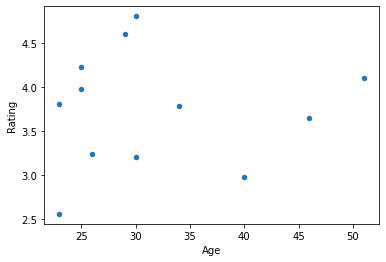

In [40]:
# Gráfico de dispersión para las variables x='Age', y='Rating' en el DataFrame
df.plot.scatter(x='Age', y='Rating')
print("Coeficiente de correlación entre Age y Rating:", df.corr()['Age']['Rating'])
df.corr()

<a id="scatter"></a>
### Interpretemos el gráfico de dispersión 

[Volver al índice](#toc)

- El coeficiente de correlación $r \approx 0.0586$, es cercano a cero, 
lo que significa que si $x$ (Age) aumenta, no se observa ni un aumento ni un decremento de la variable $y$ (Rating). Las dos variables no están relacionadas.
- En la celda siguiente se puede obervar un gráfico de dispersión con un modelo (de regresión) lineal sobrepuesto sobre los datos. El modelo además construye un intervalo de confianza de 68%.
  - En este caso podemos observar que no existe una relación lineal entre ambas variables.
  
- **Explore de manera interactiva la correlación:** https://en-interactive.herokuapp.com/#/2/1

<AxesSubplot:xlabel='Age', ylabel='Rating'>

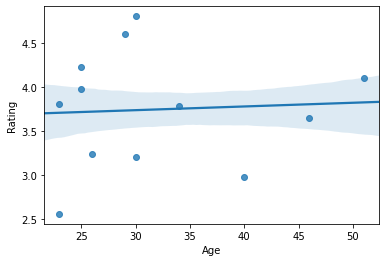

In [41]:
sns.regplot(data=df, x='Age', y='Rating', ci=68, truncate=False)

### Qué pasa si agrupamos nuestros datos

- Vamos a construir tres grupos a partir de los valores observados:
  - Grupo A: Jóvenes (Age<=30), con rating alto (Rating>=3.5)
  - Grupo B: Excluyendo el grupo A de los datos originales, 
    - Jóvenes (Age<=35), con rating bajo (Rating<=4)
  - Grupo C: Mayores a 40 años (Age>=40).
- Puede estudiar el código después, céntrese en interpretar el histograma para los diferentes grupos. 

### Opcional: Practica Python

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

Coeficiente de correlación entre Age y Rating para el Grupo A: 0.9752393734811666
Coeficiente de correlación entre Age y Rating para el Grupo B: 0.9213632212470316
Coeficiente de correlación entre Age y Rating para el Grupo C: 0.9981711985280095


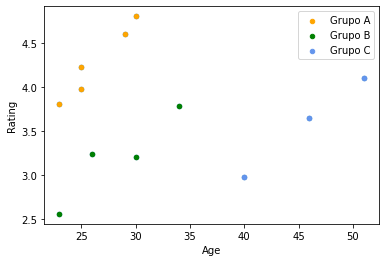

In [42]:
# reset rc params to defaults
sns.reset_orig()
fig, ax = plt.subplots()
df.plot.scatter(x='Age', y='Rating', ax=ax)
grupo_A = df[(df['Age']<=30) & (df['Rating']>=3.5)]
df_minus_A = pd.concat([df, grupo_A]).drop_duplicates(keep=False)  # df menos group_A
grupo_A.plot.scatter(x='Age', y='Rating', ax=ax, c="orange", label="Grupo A")
grupo_B = df_minus_A[(df_minus_A.Age<=35) & (df_minus_A.Rating<=4)] 
grupo_B.plot.scatter(x='Age', y='Rating', ax=ax, c="green", label="Grupo B")
grupo_C = df[df['Age']>=40] 
grupo_C.plot.scatter(x='Age', y='Rating', ax=ax, c="cornflowerblue", label="Grupo C")

print("Coeficiente de correlación entre Age y Rating para el Grupo A:", grupo_A.corr()['Age']['Rating'])
print("Coeficiente de correlación entre Age y Rating para el Grupo B:", grupo_B.corr()['Age']['Rating'])
print("Coeficiente de correlación entre Age y Rating para el Grupo C:", grupo_C.corr()['Age']['Rating'])

### ¿Tres modelos mejor que uno?

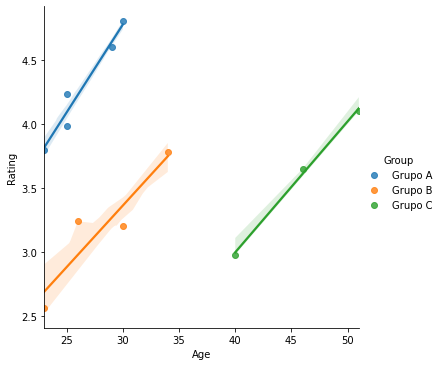

In [43]:
df["Group"] = pd.Series(["Grupo A"]*len(grupo_A)+["Grupo B"]*len(grupo_B)+["Grupo C"]*len(grupo_C),
    index=list(grupo_A.index)+list(grupo_B.index)+list(grupo_C.index))

sns.lmplot(data=df, x="Age", y="Rating", hue="Group", ci=68)

<a id="cor"></a>
### Calculemos el coeficiente de correlación para el grupo A

[Volver al índice](#toc)

- La covarianza se define como:  
$$s_{xy}=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{n-1}$$

- El coeficiente de correlación de Pearson como:

$$r_{xy}=\frac{s_{xy}}{s_x s_y}$$

- Analizando el signo en la fórmula de la covarianza y observando el gráfico de dispersión, 
  - Tenemos dos observaciones cuyos valores en $x$ y $y$ están por encima de las respectivas medias 
  $\bar{x}$, $\bar{y}$, es decir en la multiplicación $(x_i-\bar{x})(y_i-\bar{y})$ ambos términos son positivos, por tanto su valor es positivo.
  - En el caso de las tres observaciones cuyos valores en $x$ y $y$ están por debajo de las respectivas medias 
  $\bar{x}$, $\bar{y}$, es decir en la multiplicación $(x_i-\bar{x})(y_i-\bar{y})$ ambos términos son negativos, por tanto su valor resultante es positivo.
  - Podemos concluir por tanto que si el valor $x$ aumenta $y$ aumenta, y
    - si el valor $x$ disminuye $y$ disminuye, por lo tanto la covarianza y el coeficiente de correlación serán positivos
  - Note que el denominandor $r_{xy}$ será siempre positivo dado que las varianzas $s_x$ y $s_y$ son positivas. 
  
- Analice las matrices de covarianza (**DataFrame.cov()**) y de correlación (**DataFrame.corr()**) que hemos usado de pandas.

### Opcional: Practica Python

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">


Matriz de covarianza


,Age,Rating
Age,8.8000,1.20650
Rating,1.2065,0.17392


Covarianza: 1.2064999999999997
Varianza de Age 8.799999999999999
Varianza de Rating 0.17391999999999994

Matriz de correlación


,Age,Rating
Age,1.000000,0.975239
Rating,0.975239,1.000000


Coeficiente de correlación: 0.9752393734811675


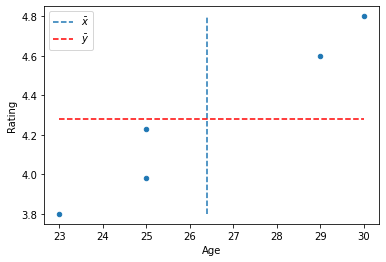

In [44]:
from IPython.display import display

grupo_A.plot.scatter(x="Age", y="Rating")  # gráfico de dispersión
plt.vlines(grupo_A.Age.mean(), grupo_A.Rating.min(), grupo_A.Rating.max(), 
           linestyles="dashed", label=r'$\bar{x}$')  # media en x, linea vertical
plt.hlines(grupo_A.Rating.mean(), grupo_A.Age.min(), grupo_A.Age.max(), 
           linestyles="dashed", colors="red", label=r'$\bar{y}$') # media en y, linea horizontal
plt.legend()

print("\nMatriz de covarianza")
display(grupo_A.cov())
covarianza = ((grupo_A.Age - grupo_A.Age.mean())*
              (grupo_A.Rating - grupo_A.Rating.mean())
             ).sum() / (len(grupo_A) - 1)

print("Covarianza:", covarianza)
print("Varianza de Age", grupo_A.Age.var())
print("Varianza de Rating", grupo_A.Rating.var())

print("\nMatriz de correlación")
display(grupo_A.corr())

correlacion = covarianza / (grupo_A.Age.std()*grupo_A.Rating.std())
print("Coeficiente de correlación:", correlacion)

<a id="group"></a>
### Descripción de datos agrupados por una variable categórica

[Volver al índice](#toc)

- El dataframe resultante en nuestro ejercicio de separar los datos originales en grupos nos permite describir el dataset con respecto a estos grupos. 
```Python
df.groupby("Group").describe()
```
- En el notebook de Análisis Exploratorio veremos un ejemplo más detallado.

In [45]:
df.groupby("Group").describe()

Age                                                     Rating  \
        count       mean       std   min    25%   50%   75%   max  count   
Group                                                                      
Grupo A   5.0  26.400000  2.966479  23.0  25.00  25.0  29.0  30.0    5.0   
Grupo B   4.0  28.250000  4.787136  23.0  25.25  28.0  31.0  34.0    4.0   
Grupo C   3.0  45.666667  5.507571  40.0  43.00  46.0  48.5  51.0    3.0   

                                                             
             mean       std   min    25%   50%    75%   max  
Group                                                        
Grupo A  4.282000  0.417037  3.80  3.980  4.23  4.600  4.80  
Grupo B  3.195000  0.499166  2.56  3.040  3.22  3.375  3.78  
Grupo C  3.576667  0.563590  2.98  3.315  3.65  3.875  4.10

<AxesSubplot:xlabel='Group', ylabel='Rating'>

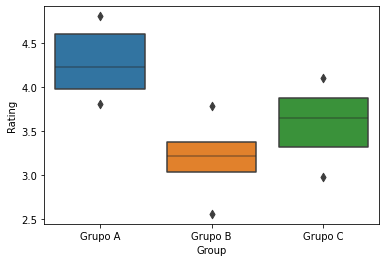

In [46]:
sns.boxenplot(data=df, x="Group", y="Rating")

<AxesSubplot:xlabel='Rating', ylabel='Density'>

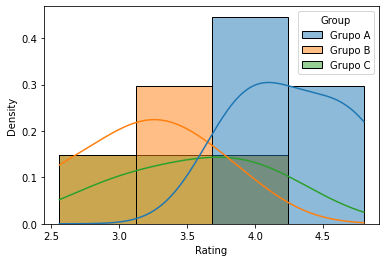

In [47]:
sns.histplot(data=df, x="Rating", hue="Group", bins=4, stat="density", kde=True)

- **Revise los siguientes conceptos:**
  - La diferencia entre el diagrama de barras y el histograma
  - Centralidad de los datos
  - Dispersión de los datos
  - Forma de los datos 
  - Simetría de los datos
  - Discuta la relación que puede existir entre dos variables numéricas

### Fuentes y recursos

[Volver al índice](#toc)

- https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm
- https://pandas.pydata.org/pandas-docs/stable/visualization.html
- Exploratory Data Analysis: 
    - https://anaconda.org/marsgr6/seaborn/notebook
    - https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm